In [256]:
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2 
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [257]:
directory = "B:\\major_project_2\\raw_ct_scan"

In [258]:
categories = ["Nodule","Non_Nodule"]

In [259]:
data = []

In [260]:
for category in categories:
    path = os.path.join(directory,category)
    label = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        ct_img = cv2.imread(img_path,0)
        ct_img = cv2.resize(ct_img,(32,32))
        image = np.array(ct_img).flatten()
        
        data.append([image,label])
        

In [395]:
len(data)

1922

In [418]:
random.shuffle(data)

In [419]:
features = []
labels = []
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [432]:
x_train , x_test ,y_train , y_test = train_test_split(features,labels,test_size = 0.2 )

In [433]:
model = SVC(C=1 , kernel="poly" ,gamma = "auto")

In [434]:
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [435]:
prediction = model.predict(x_test)

In [436]:
acc = model.score(x_test,y_test)

In [437]:
acc


0.8441558441558441

In [438]:
#import pickle
#file_name = "svm_nodule.sav"
#pickle.dump(model, open(file_name, 'wb'))

In [439]:
from sklearn.metrics import confusion_matrix
confusion_arr = confusion_matrix(y_test, prediction)

In [440]:
confusion_arr

array([[176,  32],
       [ 28, 149]], dtype=int64)

In [441]:
np.set_printoptions(precision=3)

In [442]:
from sklearn.metrics import plot_confusion_matrix


[[176  32]
 [ 28 149]]


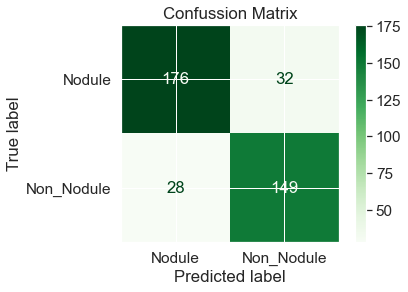

In [443]:
disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=categories,
                                 cmap=plt.cm.Greens)
disp.ax_.set_title("Confussion Matrix")

print()
print(disp.confusion_matrix)

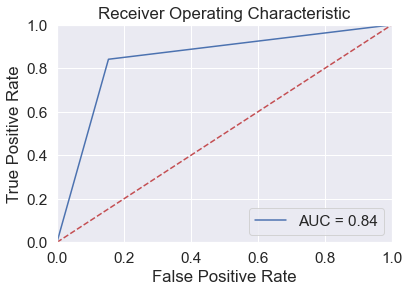

In [444]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [445]:
metrics.auc(fpr, tpr)

0.8439808778791831

In [446]:
metrics.roc_auc_score(y_test,prediction)

0.8439808778791831